In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

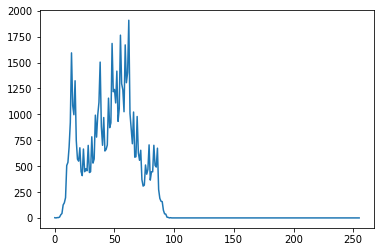

In [11]:
#histogram
img=cv2.imread("/content/drive/My Drive/CVG/lena_dark.png",0)
hist=np.zeros(256)
s=img.shape

for i in range(s[0]):
    for j in range(s[1]):
        hist[img[i,j]] += 1

plt.plot(hist) 

In [12]:
#cummulative histogram
ch=np.zeros(256)

for i in range(len(hist)):
    if i==0:
        ch[i]=hist[i]
    else:
        ch[i]=hist[i]+ch[i-1]
        
for i in range(len(ch)):
    if ch[i]!=0:
        m=i
        break

In [13]:
#Look Up Table(LUT)
lt=np.zeros(256)

for k in range(m,len(ch)):
    lt[k]=(ch[k]-ch[m])/(ch[255]-ch[m])
lt=lt*255


In [14]:
#create a new image 
img1=np.uint8(np.zeros((s[0],s[1])))


for i in range(s[0]):
    for j in range(s[1]):
        img1[i,j]=(lt[img[i,j]])

cv2.imwrite("/content/drive/My Drive/CVG/histogram_equalised.png",img1)

True

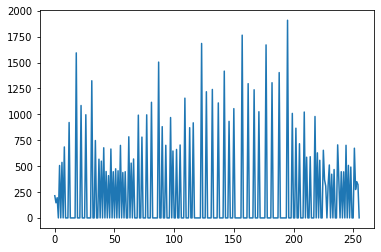

In [15]:
histnew=np.zeros(256)
for i in range(s[0]):
    for j in range(s[1]):
        histnew[img1[i,j]]+=1
plt.plot(histnew)
